In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
forest_fires = fetch_ucirepo(id=162) 
  
X = forest_fires.data.features 
y = forest_fires.data.targets 

In [30]:
y = y['area']
X = pd.get_dummies(X, columns=['month', 'day'], drop_first=True)

In [31]:
df = pd.concat([X, y], axis=1)
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,False,False,False,False,False,False,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,True,False,False,False,False,False,True,False,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,True,False,False,True,False,False,False,False,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,False,False,False,False,False,False,False,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,True,False,False,False,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,False,False,False,False,False,True,False,False,False,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,False,False,False,False,False,True,False,False,False,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,False,False,False,False,False,True,False,False,False,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,False,False,False,False,True,False,False,False,False,0.00


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
mse

11613.674532130444

In [36]:
r2 = r2_score(y_test, y_pred)
r2

0.014768502010551687

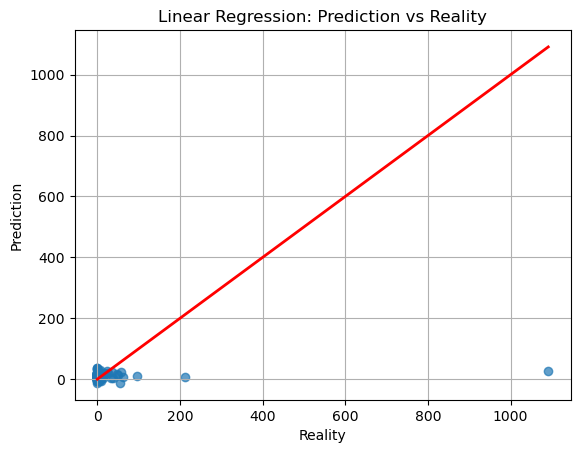

In [37]:
plt.scatter(y_test, y_pred, alpha = 0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color = 'red', linewidth = 2)
plt.xlabel('Reality')
plt.ylabel('Prediction')
plt.title('Linear Regression: Prediction vs Reality')
plt.grid(True)
plt.show()